<a href="https://colab.research.google.com/github/EmiBonClay/Exploring-Galaxies/blob/main/Galaxy_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Discovering Galactic Clusters

1. Importar Librerías.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')


import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


2. Read file

In [ ]:
path = '/content/drive/MyDrive/Astrometry/_Copy of base-datos-galaxias.xlsx'

In [ ]:
df = pd.read_excel(path)

In [ ]:
df.shape

(105335, 4)

In [ ]:
df.sample(5)

,galaxia,asc.recta,declinación,z
41177,g1044261-153205,161.108875,-15.534806,0.103337
90519,g1326318-301322,201.632667,-30.222778,0.033705
30371,g1232277-314013,188.115500,-31.670389,0.125086
50863,g0241014-044951,40.255792,-4.830917,0.042958
73851,g2201029-403617,330.261958,-40.604661,0.024251


2.1. Caracterization

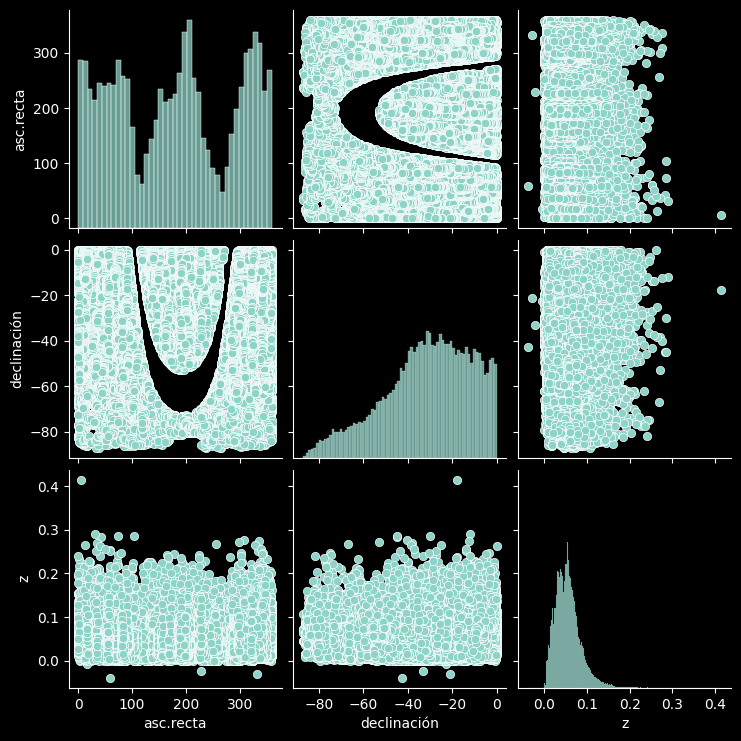

In [ ]:
sns.pairplot(df)

2.2. Reduce scope to declination interval [-10,0]

In [ ]:
df = df.loc[df['declinación']>=-10]
df = df.loc[df['declinación']<=0]

In [ ]:
#df = df.loc[df['z']>0]

In [ ]:
df.shape

(16470, 4)

2.3. Description

In [ ]:
df.describe(include='all')

,galaxia,asc.recta,declinación,z
count,16470,16470.000000,16470.000000,16470.000000
unique,16211,NaN,NaN,NaN
top,g2201451-095336,NaN,NaN,NaN
freq,2,NaN,NaN,NaN
mean,NaN,164.259402,-5.123749,0.053776
std,NaN,110.874373,2.951007,0.030578
min,NaN,0.021042,-9.999639,-0.000164
25%,NaN,58.341042,-7.730243,0.030509
50%,NaN,159.747771,-5.237264,0.050583
75%,NaN,242.999792,-2.493194,0.070542


2.4. Second Caracterization

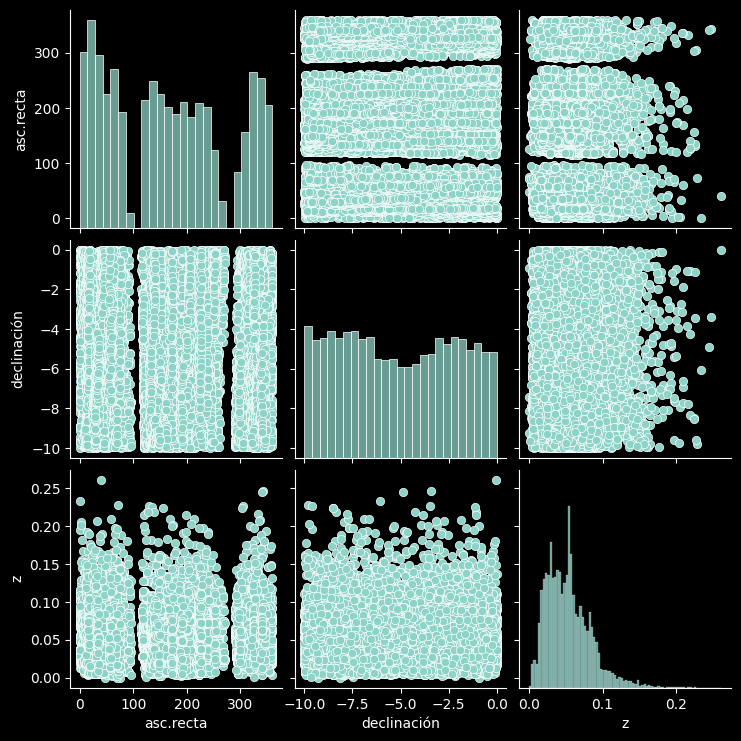

In [ ]:
sns.pairplot(df)

2.5. First polarization of z before transformation

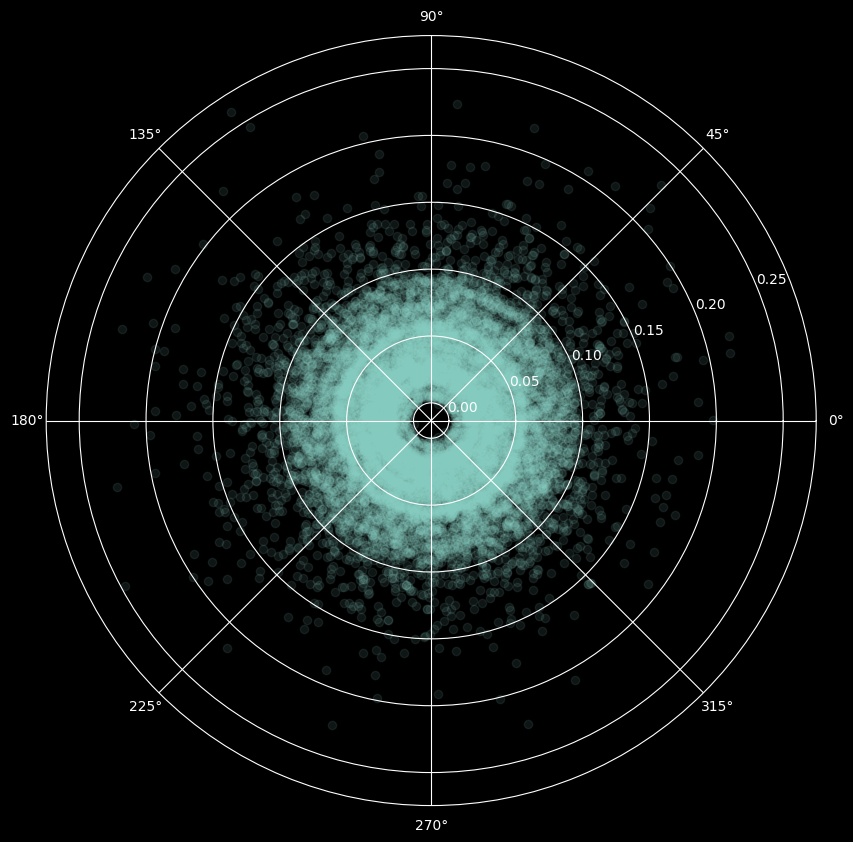

In [ ]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='polar')
c = ax.scatter(df['asc.recta'], df['z'], cmap='hsv', alpha=0.1)

3. Transformation

3.1.Introducing parameters:
* **c** = 300,000 km/s
* **H0** = Hubble's tension - Need and approach different than K

An alternative may be use the table of the following paper:
* https://www.aanda.org/articles/aa/pdf/2023/06/aa46356-23.pdf

*Abstract:*
*The current discrepancy between the Hubble constant, H0, derived from the local distance ladder and from the cosmic microwave
background is one of the most crucial issues in cosmology, as it may possibly indicate unknown systematics or new physics. Here, **we
present a novel non-parametric method to estimate the Hubble constant as a function of redshift**. We establish independent estimates
of the evolution of Hubble constant by diagonalizing the covariance matrix*



Applying the rule
dL= Luminosity Distance

**d = z*c/H0**

In [ ]:
c = 300000 #velocity of light
H0 = 71
df2 =df['z'].apply(lambda x: x*c/H0)
df2 = df2.to_frame()
df2.columns = ['dL']
df2



,dL
144,88.360563
145,85.850704
146,440.133803
147,83.750704
148,161.522535
...,...
105082,317.100000
105083,301.204225
105084,264.528169
105333,174.367606


3.2. Merging to dataframe

In [ ]:
df = pd.merge(df,df2,left_index=True,right_index=True)
df


,galaxia,asc.recta,declinación,z,dL
144,g0018409-032059,4.670458,-3.349694,0.020912,88.360563
145,g0018212-031016,4.588500,-3.171083,0.020318,85.850704
146,g0017099-012644,4.291083,-1.445667,0.104165,440.133803
147,g0017104-030352,4.293417,-3.064444,0.019821,83.750704
148,g0011269-032826,2.861958,-3.473750,0.038227,161.522535
...,...,...,...,...,...
105082,g2244420-091504,341.174792,-9.251056,0.075047,317.100000
105083,g2241107-090053,340.294750,-9.014611,0.071285,301.204225
105084,g2239494-091232,339.955917,-9.208944,0.062605,264.528169
105333,g2122150-092558,320.562458,-9.432667,0.041267,174.367606


Applying the rule

**dH = dL/(1+z)**

In [ ]:
df3 = df['dL'].apply(lambda x: x) / df['z'].apply(lambda x: x+1)
df3 = df3.to_frame()
df3.columns = ['dH']
df3

,dH
144,86.550617
145,84.141125
146,398.612348
147,82.122945
148,155.575356
...,...
105082,294.963848
105083,281.161619
105084,248.943087
105333,167.457151


3.3. Converting right ascention to polar system

In [ ]:
df = pd.merge(df,df3,left_index=True,right_index=True)
df['asc.recta'] = df['asc.recta'].apply(lambda x: x*np.pi/180)
df

,galaxia,asc.recta,declinación,z,dL,dH
144,g0018409-032059,0.081515,-3.349694,0.020912,88.360563,86.550617
145,g0018212-031016,0.080084,-3.171083,0.020318,85.850704,84.141125
146,g0017099-012644,0.074894,-1.445667,0.104165,440.133803,398.612348
147,g0017104-030352,0.074934,-3.064444,0.019821,83.750704,82.122945
148,g0011269-032826,0.049951,-3.473750,0.038227,161.522535,155.575356
...,...,...,...,...,...,...
105082,g2244420-091504,5.954623,-9.251056,0.075047,317.100000,294.963848
105083,g2241107-090053,5.939264,-9.014611,0.071285,301.204225,281.161619
105084,g2239494-091232,5.933350,-9.208944,0.062605,264.528169,248.943087
105333,g2122150-092558,5.594870,-9.432667,0.041267,174.367606,167.457151


3.4. Reducing scope to H(z)<250

In [ ]:
df = df.loc[df['dH']<500]

4. Visualization

4.1. Plot polar graph

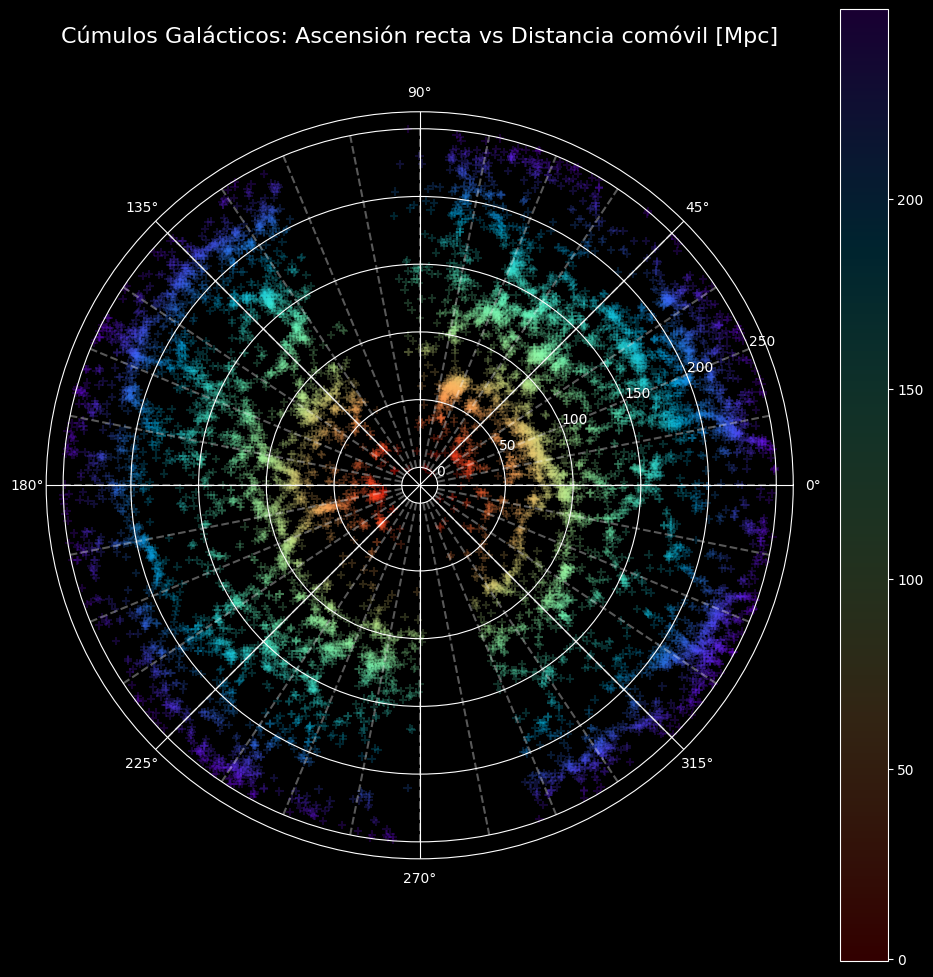

In [ ]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='polar')
ax.set_title('Cúmulos Galácticos: Ascensión recta vs Distancia comóvil [Mpc]',size=16,pad=50)

c = ax.scatter(x=df['asc.recta'], y=df['dH'], cmap='rainbow_r',c=df['dH'], alpha=0.2,marker='+')

for angle in np.linspace(0, 2*np.pi, 32, endpoint=False):  # 12 lines
    ax.plot([angle, angle], [0, df['dH'].max()], color='white', linestyle='--', alpha=0.35)
plt.colorbar(c, ax=ax)
# Add another reference line (example: a circle
#circle_radius = 245
#ax.plot(np.linspace(0, 2*np.pi, 100), [circle_radius]*100, color='red', linestyle='-.', alpha=1)

plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

x = df['asc.recta']
y = df['dH']
z = df['z']
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title=dict(text='Mt Bruno Elevation'), autosize=False,
                  width=500, height=500)
fig.show()

### In progress

4.2. Plot 3D graph

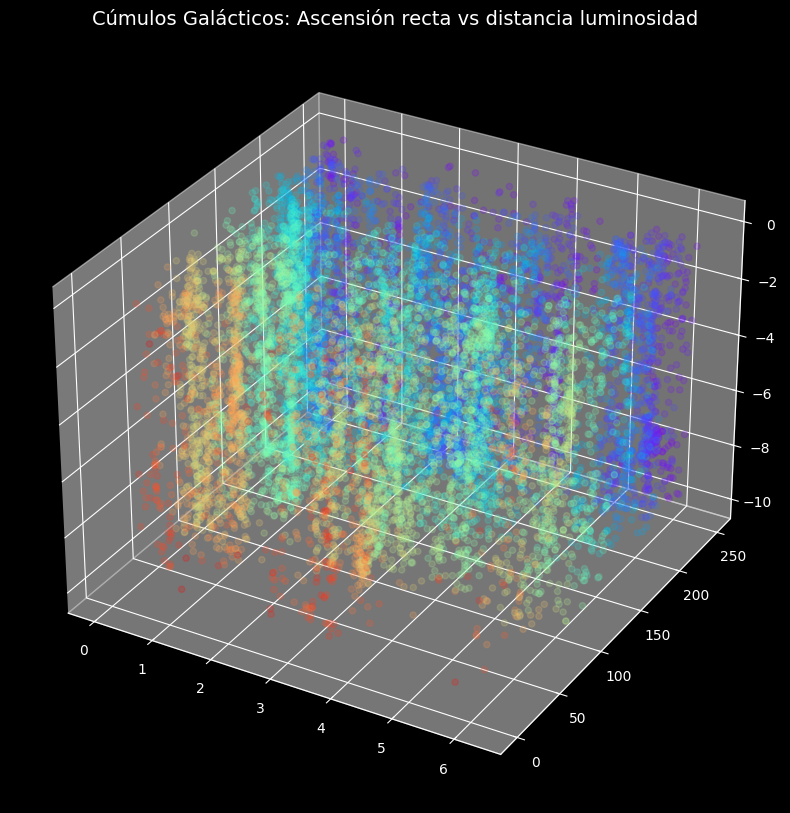

In [ ]:
# prompt: add more references lines to the previous ´polar plot

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
c = ax.scatter(df['asc.recta'],df['dH'], df['declinación'], cmap='rainbow_r', c=df['dH'],alpha=0.2,marker='o')
plt.title('Cúmulos Galácticos: Ascensión recta vs distancia luminosidad',size=14)
plt.show()

### Appendix

Regla de simpson

https://blog.espol.edu.ec/analisisnumerico/regla-de-simpson-1-3/


In [ ]:
# Integración: Regla Simpson 1/3


# INGRESO:
fx = lambda x: x/(0.3*(1+x)**3+0.7)**1/3
# intervalo de integración
a = 0
b = 14
tramos = 28

# Validar cantidad de tramos pares
esimpar = tramos%2
while (esimpar == 1):
    print('tramos: ',tramos)
    tramos = int(input('tramos debe ser par: '))
    esimpar = tramos%2

# PROCEDIMIENTO
# Regla de Simpson 1/3
h = (b-a)/tramos
xi = a
area = 0
for i in range(0,tramos,2):
    deltaA = (h/3)*(fx(xi)+4*fx(xi+h)+fx(xi+2*h))
    area = area + deltaA
    xi = xi + 2*h

# SALIDA
print('tramos:', tramos)
print('Integral: ', area)

tramos: 28
Integral:  0.4066660654578188


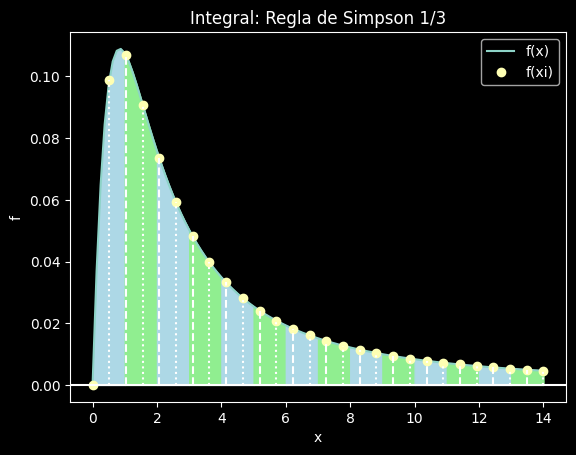

In [ ]:
# GRAFICA
# fx muestras por tramo
muestras = tramos
xi = np.linspace(a,b,muestras)
fi = fx(xi)
fi0 = np.zeros(muestras) # linea base

# fx suave aumentando muestras
muestrasfxSuave = 4*tramos + 1
xk = np.linspace(a,b,muestrasfxSuave)
fk = fx(xk)

# Relleno
for i in range(0,muestras-1,2):
    relleno = 'lightgreen'
    if (i/2)%2==0: # i/2 par
        relleno ='lightblue'
    xktramo = xk[i*4:(i+2)*4+1]
    fktramo = fk[i*4:(i+2)*4+1]
    plt.fill_between(xktramo,fktramo,fktramo*0,color=relleno)

# Funcion f(x)
plt.plot(xk,fk, label='f(x)')
plt.plot(xi,fi,'o', label='f(xi)')

# Divisiones entre Simpson 1/3
for i in range(0,muestras,1):
    tipolinea = 'dotted'
    if i%2==0: # i par
        tipolinea = 'dashed'
    plt.vlines(xi[i],fi0[i],fi[i],
                 linestyle=tipolinea)

plt.axhline(0)
plt.xlabel('x')
plt.ylabel('f')
plt.title('Integral: Regla de Simpson 1/3')
plt.legend()
plt.show()
